<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/neural_network_handwriting_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST

The **hello world** program of **deep learing**.

Each image is made up of 28 pixels in width and 28 pixels in height, resulting in a total of 784 pixels per image.  

**Grayscale**: The images are not colored (RGB); instead, each pixel holds a single value representing the intensity of gray, ranging from 0 (black) to 255 (white), with intermediate values for shades of gray


A **pixel** is the smallest unit of a digital image or display. It is a tiny square or dot that represents a single point of color or brightness in an image.

#Keras

Keras developed by François Chollet in 2015.  It was a high-level API designed to make TensorFlow easier to use.  

Google integrated Keras into TensorFlow in early 2017.  

> The code for his book is [online here](https://github.com/fchollet/deep-learning-with-python-notebooks). Much of it needs to be revised in small parts because the names of items have changed since Keras was made a part of TensorFlow



In [68]:
from tensorflow import keras

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()


# Image Shape

images three dimensions:  (width, heigh, color depth).

Grayscale have 1 channel.  Color (RGB, red, green blub) have 3.  

So 128 gray scale images shorted as shape:

(128,256,256,1)

color

(128,256,256,3)


## Color density

Grayscale Images and Bit Depth
In an 8-bit grayscale image, each pixel is represented by 8 bits (1 byte).

This allows for $2^8 = 256$
  possible intensity values.

The convention is:

* 0 = black (lowest intensity)

* 255 = white (highest intensity)

So, a pixel at a particular (height, width) coordinate with a value of 0 is black, and with a value of 255 is white. Values in between are shades of gray



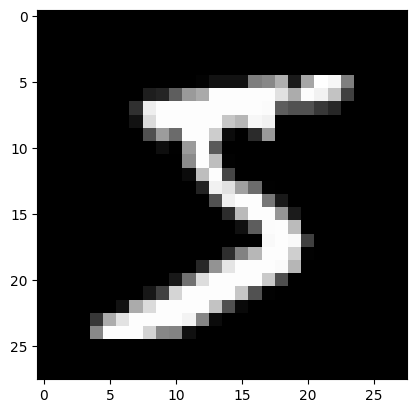

In [69]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray')

In [70]:
# white

train_images[0][0][0]

np.uint8(0)

In [71]:
train_images[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

In [72]:
#black

train_images[0][5][21]

np.uint8(255)

In [73]:
train_labels.shape

(60000,)

This network has two **Dense** layers which are densly connected (aka fully-connected).  In a dense layer, every neuron in the layer receives input from every neuron in the previous layer.

This means the layer is **fully connected**: all possible connections between the previous layer and the current layer exist.Each connection has an associated weight that is learned during training, allowing the network to model complex relationships in the data.

The second layer is a 10-way softmax layer.  It will return the data probability that each images is one of the digits 0 to 9.


> Credits: Excerpted from [this notebook](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter02_mathematical-building-blocks.ipynb)

## Loss Functions
Get's rid of linearity.  Otherwise model could only learn linear relationships.

### relu (recitified linear unit)

relu(x) = max(x, 0)

### softmax

Converts a vector of raw output scores (also called logits) from the network into a probability distribution over possible classes.

$$\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}$$

where:

* $ z_i $ is the raw score for class

* K is the total number of classes






In [74]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

Need to pick:

1. a **loss function** to measure how the network will be able determine its performance

2. and an **optimizer** which is the mechanism the network uses to update itself based on data and the loss function.

## model.compile arguments


* **optimizer="rmsprop"**—specifies rules for using the gradient descent.  
* **loss="sparse_categorical_crossentropy"**—the loss function.  Use to minimize the loss using minibatch **stochastic gradient descent**.   


In [75]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [76]:
train_images.shape

(60000, 28, 28)

convert (60000, 28, 28) to (60000, 28 * 28) - (60000, 784)

and then scale to between 0 and 1

# Why Reshape to (60000, 784)?

The first Dense layer in the provided model (layers.Dense(512, activation="relu")) expects input as 1D vectors, not 2D images. Each neuron in a Dense layer connects to every element of the input, so the 28x28 grid is flattened into a 784-element vector.



In [77]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [78]:
train_images.shape

(60000, 784)

In [79]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

It shows the **loss** and **accuracy** as it runs.  We stop when the accuracy reaches a high enough number.  Achieving a higher accuracy is done by increasing the number of epochs and adding hidden layers.

> **Remember** you reduce loss by moving in the opposite direction of the gradient.


## model.fit

Network iterates on the training data in mini-batches of 128 samples, 5 times over (each iteration over the training data is called an **epoch**)

In [80]:
import time

start = time.perf_counter()

history=model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_split=0.2)

end = time.perf_counter()

elapsed = end - start
print(f"Elapsed time: {elapsed:.6f} seconds")

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8646 - loss: 0.4795 - val_accuracy: 0.9570 - val_loss: 0.1535
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9616 - loss: 0.1317 - val_accuracy: 0.9651 - val_loss: 0.1173
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9769 - loss: 0.0813 - val_accuracy: 0.9744 - val_loss: 0.0891
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9836 - loss: 0.0568 - val_accuracy: 0.9762 - val_loss: 0.0824
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9884 - loss: 0.0418 - val_accuracy: 0.9761 - val_loss: 0.0823
Elapsed time: 8.709496 seconds


In [81]:
import numpy as np

np.set_printoptions(suppress=True)


# you cannot know which image produced which prediction

predictions=model.predict(test_images)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


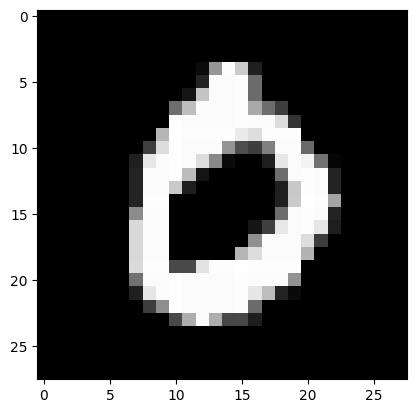

In [82]:

plt.imshow(test_images[3].reshape(28,28), cmap='gray')

# Prediction

This

```

model.predict(test_images[3:4])

[[0.99965656 0.00000034 0.0000693  0.00000061 0.00000191 0.00000301
  0.00008055 0.00017799 0.00000002 0.00000961]]

```

Returns an array of shape (1, 10), representing the probability scores for each of the 10 digit classes (0-9) for the 4th test image.

 `test_images[3:4]` selects the 4th image as a batch of one, with shape (1, 784) (assuming your images are flattened for a dense network).

`model.predict(test_images[3:4])` outputs an array of shape (1, 10), which contains the predicted probabilities for each digit class (0 through 9) for that image.


so this says it's 99% probability the image is a zero:

```
[[0.99965656 0.00000034 0.0000693  0.00000061 0.00000191 0.00000301
  0.00008055 0.00017799 0.00000002 0.00000961]]
```


In [83]:


prediction = model.predict(test_images[3:4])
print("Prediction for test_images[3]:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Prediction for test_images[3]: [[0.9993649  0.00000057 0.00011171 0.0000038  0.00000015 0.00003117
  0.00014656 0.00033782 0.00000001 0.00000323]]


In [84]:
predicted_digit = np.argmax(prediction)
print("Predicted digit for test_images[3]:", predicted_digit)

Predicted digit for test_images[3]: 0


In [85]:
test_images[3:4].shape

(1, 784)

# Tensors

When you call model.fit(train_images, train_labels, ...), Keras (which runs on top of TensorFlow) automatically converts these NumPy arrays into TensorFlow tensors before passing them into the model for training

In [86]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9767 - loss: 0.0799
test_acc: 0.9790999889373779


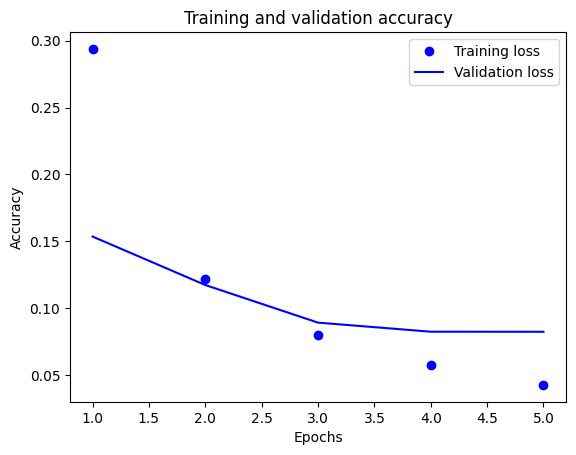

In [87]:
# Extract accuracy values
acc = history.history['loss']

# we need to save some traing data to be able to calculate validation loss

val_loss = history.history['val_loss']

# Extract epoch numbers
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Other Image Recognition DataSets


| Dataset | Description | Image Type | Classes | Typical Use Case |
|---------------------|----------------------------------------------------------|-----------------|---------|---------------------------------|
| Fashion-MNIST | 28x28 grayscale images of clothing items | Grayscale | 10 | Classify T-shirts, shoes, etc. |
| CIFAR-10 | 32x32 color images of objects (animals, vehicles, etc.) | RGB (color) | 10 | Classify cats, cars, etc. |
| CIFAR-100 | 32x32 color images, more classes | RGB (color) | 100 | Fine-grained object classes |
| STL-10 | 96x96 color images, 10 classes | RGB (color) | 10 | Higher-res objects |
| EMNIST | 28x28 grayscale images of handwritten letters/numbers | Grayscale | 47 | Letters and digits |
| Oxford-IIIT Pet | 256x256 color images of cats and dogs | RGB (color) | 37 | Pet breed classification |
